In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 6)
import random

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [1]:
from scipy import misc

In [113]:
img = misc.imread('lenna.jpg')

In [150]:
img.shape

(512, 512)

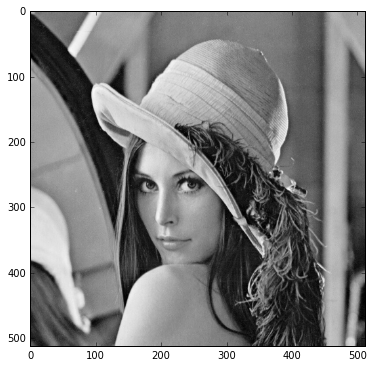

In [114]:
plt.imshow(img, cmap='gray')

## Compress images using SVD
The original image is represented by matrix $A$.

First, find SVD of $A$, 
$$A=U\Sigma V$$

Second, reconstruct the image using the top $k$ rank-1 matrices ranked by singular values
$$A' = \sum_{i=1}^k \sigma_i u_i v_i^T$$





In [117]:
# find SVD of img
U, sigma, V = np.linalg.svd(img)

In [118]:
U.shape, sigma.shape, V.shape

((512, 512), (512,), (512, 512))

In [131]:
# calculate the norm of the matrix

# induced 2-norm
print 'Induced 2-norm'
print np.linalg.norm(img, 2)
print sigma[0]

print 'Frobenius norm'
print np.linalg.norm(img,'fro')
print np.sqrt(np.sum(sigma**2))

Induced 2-norm
62278.3407524
62278.3407524
Frobenius norm
67222.0188852
67222.0188852


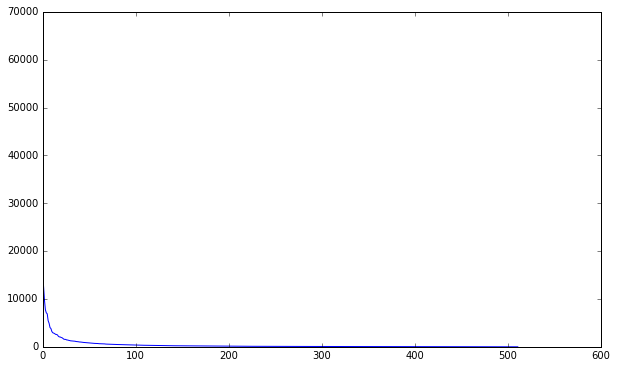

In [132]:
plt.plot(sigma)

(array([ 481.,   15.,    6.,    3.,    1.,    2.,    1.,    1.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([  1.15507419e-01,   1.24568001e+03,   2.49124452e+03,
          3.73680902e+03,   4.98237353e+03,   6.22793803e+03,
          7.47350254e+03,   8.71906704e+03,   9.96463155e+03,
          1.12101961e+04,   1.24557606e+04,   1.37013251e+04,
          1.49468896e+04,   1.61924541e+04,   1.74380186e+04,
          1.86835831e+04,   1.99291476e+04,   2.11747121e+04,
          2.24202766e+04,   2.36658411e+04,   2.49114056e+04,
          2.61569701e+04,   2.74025346e+04,   2.86480991e+04,
          2.98936636e+04,   3.11392281e+04,   3.23847926e+04,
          3.36303571e+04,   3.48759216e+04

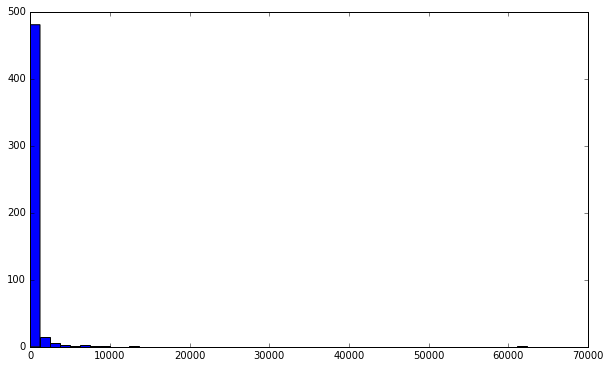

In [134]:
plt.hist(sigma,50)

In [153]:
k = 10
img2 = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])

(-0.5, 511.5, 511.5, -0.5)

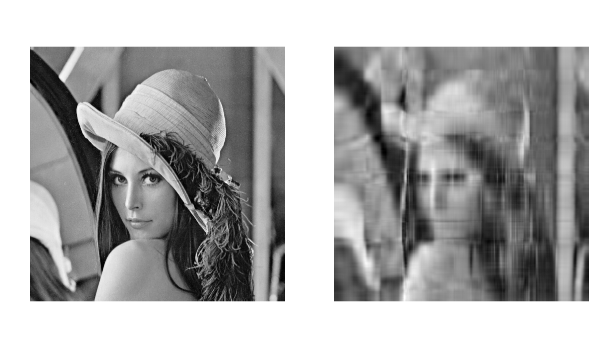

In [154]:
fig,ax = plt.subplots(1,2,sharex=True)
ax[0].imshow(img,cmap='gray')
ax[0].axis('off')
ax[1].imshow(img2,cmap='gray')
ax[1].axis('off')

##SVD Compress Color Images

In [155]:
face = misc.imread('tiger-face-close-up.jpg')

In [156]:
type(face)

numpy.ndarray

In [157]:
face.shape, face.dtype

((768, 1024, 3), dtype('uint8'))

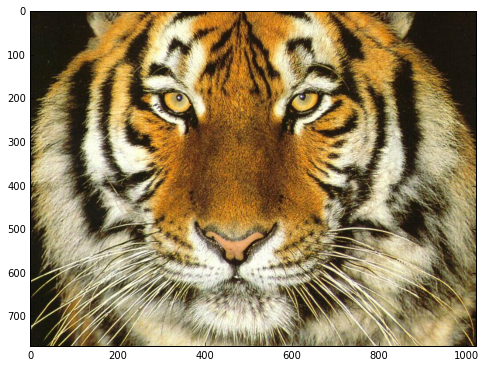

In [9]:
plt.imshow(face)

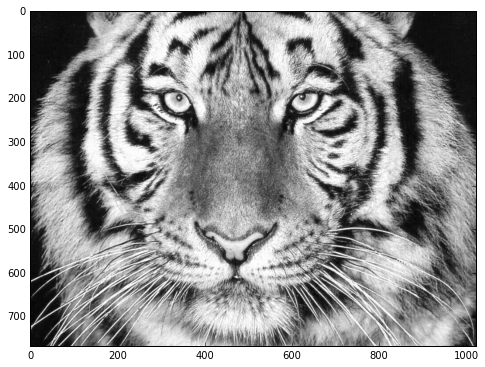

In [15]:
plt.imshow(face[:,:,0],cmap='gray')

In [16]:
U, sigma, V = np.linalg.svd(face[:,:,0])

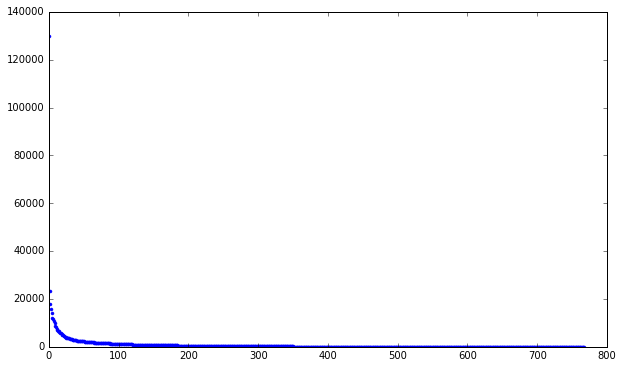

In [18]:
plt.plot(sigma,'.')

(array([ 675.,   53.,   15.,    6.,    5.,    3.,    2.,    1.,    2.,
           1.,    1.,    0.,    1.,    1.,    0.,    0.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  3.57161877e+00,   1.30235275e+03,   2.60113388e+03,
          3.89991502e+03,   5.19869615e+03,   6.49747728e+03,
          7.79625842e+03,   9.09503955e+03,   1.03938207e+04,
          1.16926018e+04

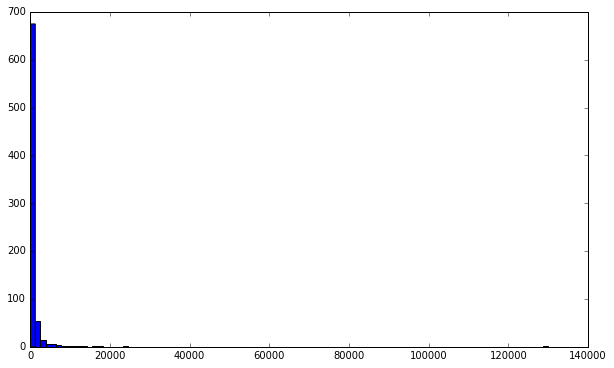

In [22]:
plt.hist(sigma,100)

In [25]:
sigma.shape

(768,)

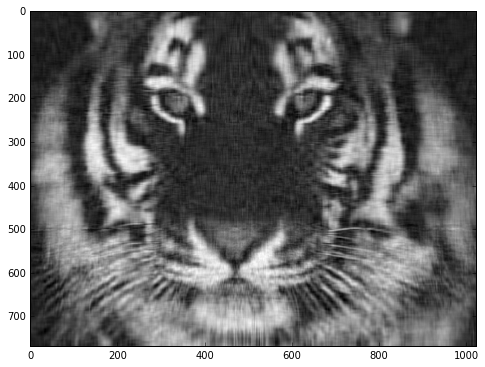

In [58]:
num_components = 150
reconstimg = np.matrix(U[:, :num_components]) * np.diag(sigma[:num_components]) * np.matrix(V[:num_components, :])

plt.imshow(reconstimg, cmap='gray');

In [109]:
num_components = 50

reimg = np.zeros(face.shape)
for i in range(3):
    U, sigma, V = np.linalg.svd(face[:,:,i])
    reimg[:,:,i] = np.matrix(U[:, :num_components]) * np.diag(sigma[:num_components]) * np.matrix(V[:num_components, :])

In [110]:
reimg[np.where(reimg>=255)]=255
reimg[np.where(reimg<0)]=0

(-0.5, 1023.5, 767.5, -0.5)

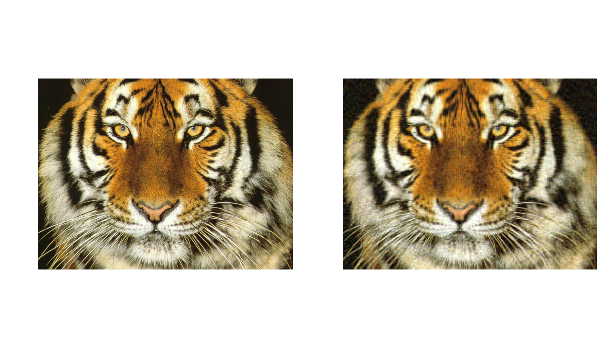

In [149]:
fig,ax = plt.subplots(1,2,sharex=True)
ax[0].imshow(face)
ax[0].axis('off')
ax[1].imshow(reimg.astype(face.dtype))
ax[1].axis('off')